In [1]:
import dask as da

In [191]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.dask
import numpy as np
import dask.array as da
import pickle
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [294]:
df = dd.read_csv("data/training_set_VU_DM.csv")

In [6]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


- nr hotels in each search
- most active time -> makes no sense would need to account for location
- most popular hotels
- correlation plot
- dendrogram
- prices and availability expedia vs competitors
- most common characteristics (e.g., nr ppl, nr children, duration of stay, money spend, book where from where most)

1. Nr hotels per search

In [7]:
n_unique_searches = df["srch_id"].nunique()
n_search = df["srch_id"].count()
n_hotels_per_search = (n_search/n_unique_searches).compute()

In [8]:
print(f"The average search shows {round(n_hotels_per_search,2)} hotels.")

The average search shows 24.82 hotels.


2. Most popular hotels/ Distribution of how often hotels have been found in searches.

In [10]:
n_hotel_clicked = df["prop_id"].value_counts(sort=False) # how often a hotel has popped up in a search
counts_arr = da.from_array(counts.values).compute()

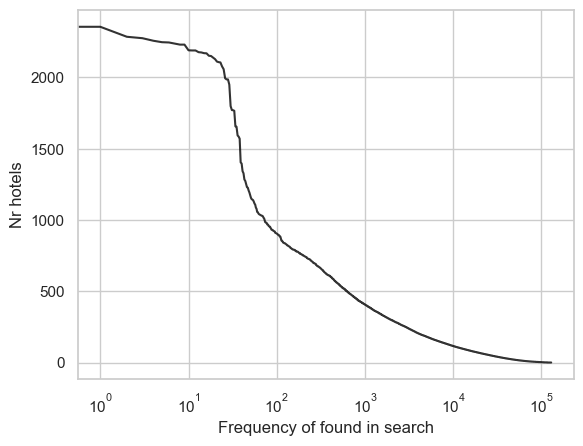

In [284]:
plt.figure()
plt.semilogx(counts_arr, color='black',alpha=0.8)
plt.ylabel("Nr hotels")
plt.xlabel("Frequency of found in search")
plt.show()

3. ***most popular countries using the site***

In [60]:
# could have a map plot here

4. Correlation matrix

In [201]:
corr_df = df.corr(numeric_only=True).compute()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,1.000000,0.003331,-0.006097,-0.010462,0.000316,-0.005468,-0.000166,-0.001577,-0.002959,-0.003828,0.000439,0.002368,-0.003434,-0.001505,-0.000699,0.000876,0.000594,-0.001256,-0.002946,0.004007,0.000138,0.005654,0.000531,-0.000155,0.000689,-0.000697,0.004421,-0.002821,-0.010863,0.001495,-0.000544,-0.002939,0.000080,-0.000671,-0.002288,0.004166,-0.001274,0.018297,0.000636,0.000349,-0.002592,-0.000303,0.003072,0.007789,-0.002917,0.002822,0.003499,0.000073,-0.001070,0.000841,0.000194,0.000951,0.000487
site_id,0.003331,1.000000,-0.305921,0.309078,0.099104,-0.312593,0.002943,0.174845,-0.071645,-0.196217,0.178399,0.056689,0.028635,-0.031194,-0.000957,0.083634,0.020410,0.106386,0.168395,-0.022573,-0.038736,0.024071,-0.082649,0.063523,0.338368,0.026814,0.004367,0.003661,0.045806,0.048365,0.009882,0.008550,0.034953,0.055601,-0.000678,-0.015062,-0.098147,-0.021116,-0.019688,-0.019393,-0.000619,-0.001699,-0.005965,-0.006023,-0.001217,-0.011761,-0.004750,0.012756,-0.005167,0.000152,0.008497,0.053015,-0.001354
visitor_location_country_id,-0.006097,-0.305921,1.000000,-0.256252,-0.073231,0.482787,0.000432,-0.112911,0.064279,0.182405,-0.121392,-0.009244,-0.021898,0.018716,-0.001791,-0.032065,0.000219,-0.097225,-0.087573,0.002687,0.012874,-0.027091,0.068939,0.030090,-0.056978,-0.037232,-0.013795,-0.000876,-0.074206,-0.025231,-0.008688,-0.009103,-0.022486,-0.035703,-0.007390,0.023095,0.051269,0.006340,0.024885,0.022409,-0.003119,0.002326,-0.002011,-0.012159,0.004379,-0.006172,-0.017498,-0.016626,0.010390,-0.001532,-0.004806,-0.048212,0.002524
visitor_hist_starrating,-0.010462,0.309078,-0.256252,1.000000,0.498618,-0.285770,0.007933,0.295903,-0.000815,-0.183249,0.250895,0.054019,0.060343,-0.014273,0.174804,0.083416,0.005700,0.077293,0.092211,-0.011558,0.036969,0.023669,-0.002707,0.159158,0.273962,0.015375,0.015217,-0.013398,-0.045323,0.034156,0.033764,0.012841,0.035424,0.042160,0.012073,-0.023341,-0.020877,-0.036377,-0.014429,-0.014299,0.011311,0.000287,-0.008183,0.002736,-0.001198,-0.005446,-0.001889,0.034486,0.000307,0.004346,0.002541,0.104260,-0.002044
visitor_hist_adr_usd,0.000316,0.099104,-0.073231,0.498618,1.000000,-0.073566,0.000575,0.153966,0.046391,-0.057195,0.152472,0.034933,0.034697,-0.015388,0.186106,0.045911,0.005054,0.085236,0.111427,0.039195,0.064613,0.015631,0.003858,0.097640,0.159176,0.018137,0.012048,-0.017765,-0.097599,0.008007,0.015987,-0.006133,0.004130,-0.003338,0.010354,0.005874,0.055222,-0.014169,-0.004053,-0.011675,0.018352,-0.004106,0.017422,-0.010555,0.004687,0.011371,-0.010601,0.006237,-0.002069,0.002971,0.003858,0.108476,0.000602
prop_country_id,-0.005468,-0.312593,0.482787,-0.285770,-0.073566,1.000000,0.000162,-0.161729,0.092686,0.310493,-0.183344,-0.028828,-0.021119,0.029850,-0.004450,-0.041365,-0.011439,-0.084679,-0.118640,0.028440,0.057388,-0.011804,0.076750,0.016483,-0.365723,-0.030175,-0.110897,-0.029908,-0.085624,-0.050545,-0.013521,-0.014026,-0.056500,-0.063506,-0.009064,0.030961,0.132929,0.023375,0.030948,0.028318,-0.002788,-0.017244,-0.029468,-0.041114,-0.007162,-0.061137,-0.024660,-0.031299,0.011225,-0.002427,-0.006222,-0.064152,0.001227
prop_id,

In [206]:
corr_df.fillna(0,inplace=True)

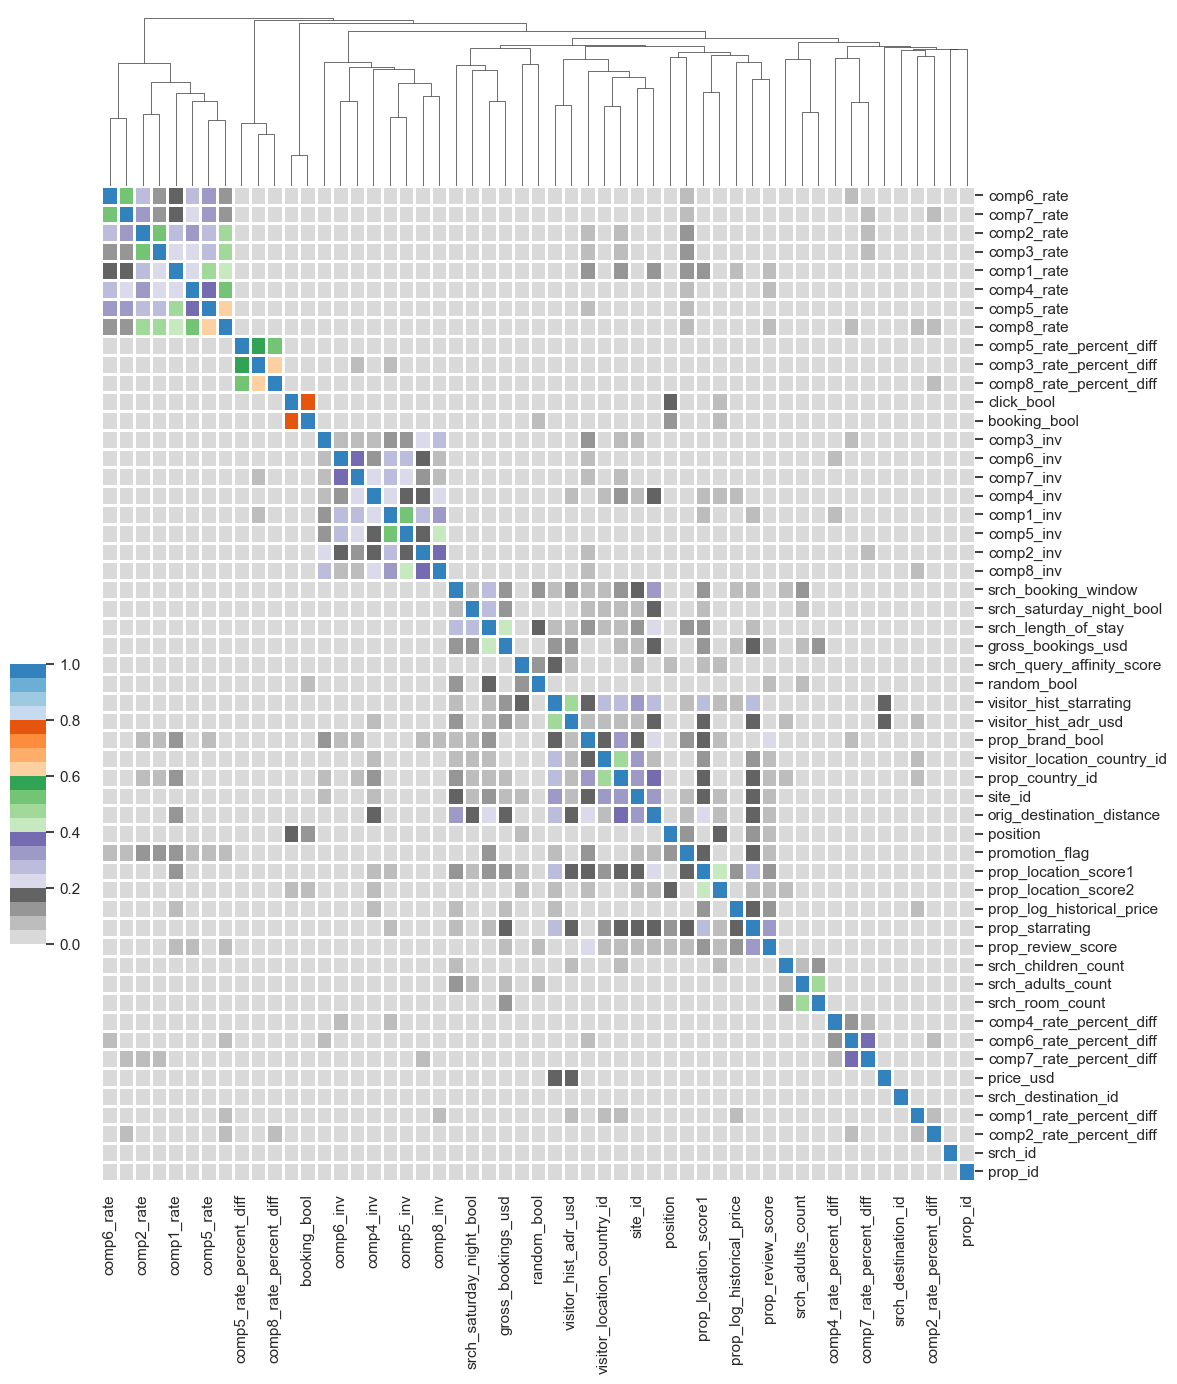

In [490]:

g = sns.clustermap(corr_df_abs, cmap="tab20c_r",
                   dendrogram_ratio=(.1, .15),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 14)) # 12,13

g.ax_row_dendrogram.remove()
g.savefig("figures/1_correl_matrix.png", dpi=300, bbox_inches="tight")

5. Expedia vs. rest
- availability 
- price

In [427]:
rate_cols = [f"comp{i}_rate" for i in np.arange(1,9)]
inv_cols = [f"comp{i}_inv" for i in np.arange(1,9)]


c_rate = df[rate_cols].mean().compute()
c_avail = df[inv_cols].mean().compute()

In [428]:
[f"comp{i}_inv" for i in np.arange(1,9)]

['comp1_inv',
 'comp2_inv',
 'comp3_inv',
 'comp4_inv',
 'comp5_inv',
 'comp6_inv',
 'comp7_inv',
 'comp8_inv']

In [429]:
# add grand average to the hotel
c_rate_m = np.append(np.array(c_rate),c_rate.mean())
c_avail_m = np.append(np.array(c_avail),c_avail.mean())
x = [str(i) for i in np.arange(1,9)]
x.append("Avg")

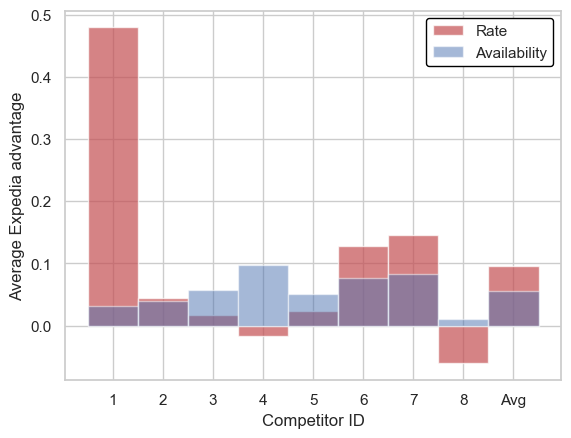

In [491]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, c_rate_m, width=1, color='r',alpha=0.7, label="Rate")
ax.bar(x, c_avail_m, width=1, color='b',alpha=0.5, label="Availability")
plt.xlabel("Competitor ID")
plt.ylabel("Average Expedia advantage")
leg = plt.legend(loc="upper right", facecolor="white", edgecolor="black")
leg.get_frame().set_alpha(1)
plt.savefig("figures/1_competitor_bar.png", dpi=300, bbox_inches="tight")

6. Average customer
- we are only considering hotels that have been booked

In [ ]:
df_f = df[df["booking_bool"]==1] 

In [487]:
customer_cols = ["srch_room_count","srch_length_of_stay","srch_adults_count",
                 "srch_children_count","visitor_location_country_id","srch_booking_window"]
aggr_df_c = df_f[customer_cols].compute().agg(["mean","median","std",lambda x: pd.Series.mode(x)[0],"min","max"])
aggr_df_c.rename(index={"<lambda>": "mode"}, inplace=True)

In [486]:
aggr_df_c

,srch_room_count,srch_length_of_stay,srch_adults_count,srch_children_count,visitor_location_country_id,srch_booking_window
mean,1.130096,2.089616,1.945444,0.367230,176.322191,31.465482
median,1.000000,2.000000,2.000000,0.000000,219.000000,13.000000
std,0.436021,1.692546,0.879037,0.738476,65.452315,46.753967
mode,1.000000,1.000000,2.000000,0.000000,219.000000,1.000000
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,8.000000,30.000000,9.000000,9.000000,231.000000,482.000000


7. Average (booked) Hotel

In [488]:
hotel_cols = ["prop_country_id","prop_starrating","prop_review_score","prop_brand_bool",
              "prop_location_score1","prop_location_score2", "prop_log_historical_price"]
aggr_df_h = df_f[hotel_cols].compute().agg(["mean","median","std",lambda x: pd.Series.mode(x)[0],"min","max"])
aggr_df_h.rename(index={"<lambda>": "mode"}, inplace=True)

In [489]:
aggr_df_h

,prop_country_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price
mean,174.468972,3.312060,3.937649,0.663090,2.843014,0.188592,4.309180
median,219.000000,3.000000,4.000000,1.000000,2.710000,0.127600,4.930000
std,67.876724,0.949982,0.803344,0.472656,1.476368,0.187394,1.826305
mode,219.000000,3.000000,4.000000,1.000000,0.690000,0.000000,0.000000
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,230.000000,5.000000,5.000000,1.000000,6.970000,1.000000,6.210000
